## Analysis that Highlight experimental hypothesis

Here I am looking at battles won and loss by Kings of Westeros. I want to analyze the contributing factors that go into a victorious battle.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [170]:
battles = pd.read_csv('battles.csv')

In [171]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [172]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


## Kings on the offensive
The data has each king’s performance when he was both the agressor and the defender. Does making the first move help? or does it hurt?

Let’s look at how each king faired when he was the attacker.

In [173]:
#Replace strings with numbers
battles.attacker_outcome.replace('win',1,inplace=True)
battles.attacker_outcome.replace('loss',0,inplace=True)
battles.attacker_outcome.fillna(0,inplace=True)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

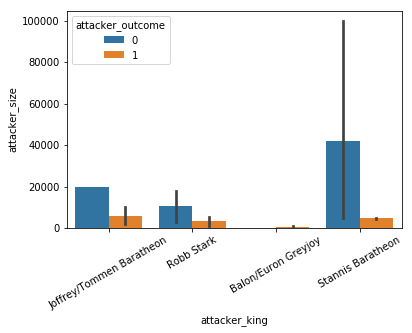

In [174]:
#Attacker kings army size and outcome
sns.barplot(x='attacker_king', y='attacker_size', hue='attacker_outcome', data=battles)
plt.xticks(rotation=30)

[[<matplotlib.axis.XTick at 0x113c7cd0>,
 [Text(0,0,'Baratheon'),
  Text(0,0,'Bolton'),
  Text(0,0,'Bracken'),
  Text(0,0,'Darry'),
  Text(0,0,'Free folk'),
  Text(0,0,'Frey'),
  Text(0,0,'Greyjoy'),
  Text(0,0,'Lannister'),
  Text(0,0,'Stark')]]

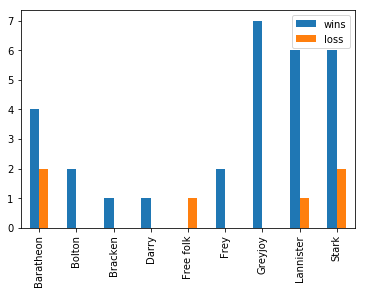

In [175]:
battles['battle_size']=battles['attacker_size'].fillna(0)+battles['defender_size'].fillna(0)
battles['defender_king']=battles['defender_king'].fillna('NA')
battles['attacker_king']=battles['attacker_king'].fillna('NA')
battles['attacker_outcome']=battles['attacker_outcome'].fillna('NA')

battles_win=battles[['attacker_1', 'attacker_outcome']]

battles_los=battles_win.loc[battles_win['attacker_outcome']==0]
battles_win=battles_win.loc[battles_win['attacker_outcome']==1]
battles_win=battles_win.groupby(['attacker_1'],as_index=False).count()
battles_los=battles_los.groupby(['attacker_1'],as_index=False).count()
battles_win.rename(columns={'attacker_outcome':'wins'}, inplace=True)
battles_los.rename(columns={'attacker_outcome':'loss'}, inplace=True)

battles_com = pd.merge(battles_win, battles_los, on = 'attacker_1', how='outer')
battles_com['wins'] = battles_com['wins'].fillna(0)
battles_com['loss'] = battles_com['loss'].fillna(0)
battles_com = battles_com.sort_values('attacker_1')
Xu1, X1 = np.unique(battles_com['attacker_1'], return_inverse=True)

ax = battles_com[['wins','loss']].plot(kind='bar')
ax.set(xticks=range(len(Xu1)),xticklabels=Xu1)

In [176]:
battles['battle_size']=battles['attacker_size'].fillna(0)+battles['defender_size'].fillna(0)
battles['defender_king']=battles['defender_king'].fillna('NA')
battles['attacker_king']=battles['attacker_king'].fillna('NA')
battles['attacker_outcome']=battles['attacker_outcome'].fillna('NA')

battles_win_king=battles[['attacker_king', 'attacker_outcome']]

battles_los_king=battles_win_king.loc[battles_win_king['attacker_outcome']==0]
battles_win_king=battles_win_king.loc[battles_win_king['attacker_outcome']==1]
battles_win_king=battles_win_king.groupby(['attacker_king'],as_index=False).count()
battles_los_king=battles_los_king.groupby(['attacker_king'],as_index=False).count()
battles_win_king.rename(columns={'attacker_outcome':'wins'}, inplace=True)
battles_los_king.rename(columns={'attacker_outcome':'loss'}, inplace=True)

battles_com_king = pd.merge(battles_win_king, battles_los_king, on = 'attacker_king', how='outer')
battles_com_king['wins'] = battles_com_king['wins'].fillna(0)
battles_com_king['loss'] = battles_com_king['loss'].fillna(0)
battles_com_king = battles_com_king.sort_values('attacker_king')
battles_com_king.fillna(0)

,attacker_king,wins,loss
0,Balon/Euron Greyjoy,7,0.0
1,Joffrey/Tommen Baratheon,12,1.0
2,Robb Stark,8,2.0
3,Stannis Baratheon,2,3.0


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

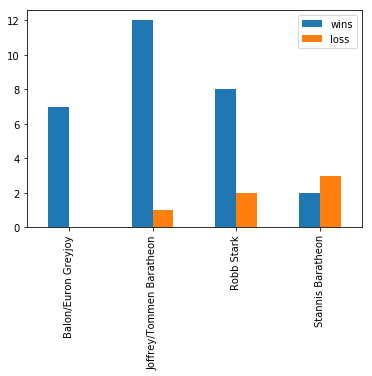

In [177]:
Xu1, X1 = np.unique(battles_com_king['attacker_king'], return_inverse=True)

ax = battles_com_king[['wins','loss']].plot(kind='bar')
ax.set(xticks=range(len(Xu1)),xticklabels=Xu1)
plt.xticks(rotation=90)

>- Joffrey/Tommen had the most wins as attacker king with 12, and only 1 loss.
>- Robb Stark fared well as attacker - 8 wins and 2 losses.
>- Balon/Euron went undefeated at 7-0.
>- Stannis Baratheon had 2 wins and 3 loss as attacker.

In [178]:
battles['battle_size']=battles['attacker_size'].fillna(0)+battles['defender_size'].fillna(0)
battles['defender_king']=battles['defender_king'].fillna('NA')
battles['attacker_king']=battles['attacker_king'].fillna('NA')
battles['attacker_outcome']=battles['attacker_outcome'].fillna('NA')

battles_win_king=battles[['defender_king', 'attacker_outcome']]

battles_los_king=battles_win_king.loc[battles_win_king['attacker_outcome']==0]
battles_win_king=battles_win_king.loc[battles_win_king['attacker_outcome']==1]
battles_win_king=battles_win_king.groupby(['defender_king'],as_index=False).count()
battles_los_king=battles_los_king.groupby(['defender_king'],as_index=False).count()
battles_win_king.rename(columns={'attacker_outcome':'wins'}, inplace=True)
battles_los_king.rename(columns={'attacker_outcome':'loss'}, inplace=True)

battles_com_king = pd.merge(battles_win_king, battles_los_king, on = 'defender_king', how='outer')
battles_com_king['wins'] = battles_com_king['wins'].fillna(0)
battles_com_king['loss'] = battles_com_king['loss'].fillna(0)
battles_com_king.fillna(0)
battles_com_king = battles_com_king.sort_values('defender_king')
battles_com_king

#Xu1, X1 = np.unique(battles_com_king['defender_king'], return_inverse=True)
#ax = battles_com_king[['wins','loss']].plot(kind='bar')
#ax.set(xticks=range(len(Xu1)),xticklabels=Xu1)
#plt.xticks(rotation=90)

,defender_king,wins,loss
0,Balon/Euron Greyjoy,3.0,0.0
1,Joffrey/Tommen Baratheon,9.0,4.0
5,Mance Rayder,0.0,1.0
2,Renly Baratheon,1.0,0.0
3,Robb Stark,14.0,1.0
4,Stannis Baratheon,2.0,0.0


## The Problem

Stannis Baratheon is tired of losing battles. How can he win more battles? Losing battles results in loss of soldiers therefore weakening his army and chances of ruling the seven kingdoms. When interviewed, soldiers felt they came to defeat because they were caught off guard.

## The Potential Solution

Being on the attacking side will increase chances of winning battles as the defending army is caught off guard and is ill prepared for a victory.

## The method of testing the solution

Battle Scientists will study all army's with soldiers of 5000 to 10,000 of 1 years (Year 299 to Year 300). Army's will be randomly selected as 'attackers' or 'defenders' matched together with army's of similiar size. The variable of interest is victory of 'attackers' and 'defenders'.

We will compute victory rate for the previous year before the study (Year 298 to 299) and compare it to victory rate in 'attackers' and 'defenders' for the year during the study.

If victory for attackers in the year of study increases by 20% then we can conclude that being the 'attacker' is effective and plan more attacks rather than stay at dragonstone and defend the land. If victory in the year of study decreases by less than one standard deviation, observe for another 2 months. If victories do not increase, then go back to dragonstone and continue to defend.